### $\color{green}{\text{Processing and Explore Data}}$
- > Objectives of this notebook
      - > 1 Explore and visualize the data


#### Author: mandar.tabib@sintef.no , Computational Science and Engineering,SINTEF Digital.


## Imports

In [172]:
# In case of reloading functions
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [173]:
import os,sys
current_dir = os.getcwd()    # Get the current directory. 
sys.path.append(current_dir) # Append to path 
fn2=os.path.join(current_dir,'..','SourceCode')
sys.path.append(fn2)         # Add the path to the folder containing imports.py




In [174]:
import imports_kpn_ann as kpn

In [175]:
import pandas as pd

## Load Dataset



In [176]:
# Data path for pre-processed data
datapath ="../Data/Coefficient/"

# Data path for modeled data
modelpathbase = "../Data/Coefficient/" 

## Reading files

Model files are time series generated by the Fortran Model

##### Data time series

In [177]:
# Data from measurement data
A = kpn.np.load(datapath + 'A.npy') #Features for the momentum
MomentumRes = kpn.np.load(datapath + 'MomentumRes.npy') #label for the momentum

B = kpn.np.load(datapath + 'B.npy') #Features for the pressure
PPERes = kpn.np.load(datapath + 'PPERes.npy') #label for the pressure



In [178]:
print ("A",type(A) , A.shape) 

print ("MomentumRes",type(MomentumRes) , MomentumRes.shape)

print ("B",type(B) , B.shape) 

print ("PPERes",type(PPERes) , PPERes.shape)

A <class 'numpy.ndarray'> (100, 3, 18)
MomentumRes <class 'numpy.ndarray'> (100, 18)
B <class 'numpy.ndarray'> (100, 3, 10)
PPERes <class 'numpy.ndarray'> (100, 10)


In [179]:
import optuna as opt

In [180]:
ensemble=False
if ensemble:
  dirFile='../Models/Ensemble_LSTM_Case102_1_Short_validation_Optuna' #Note: see validation ratio chosen in split time-series below.
  dirFile_data='../Data/Processed_training_test'
  dirFile_result='../Results'
else:
  dirFile='../Models/LSTM_HAM'
  kpn.create_directory_if_not_exists(dirFile)
  dirFile_data='../Data/Processed_training_test'
  kpn.create_directory_if_not_exists(dirFile_data)
  dirFile_result='../Results'
  kpn.create_directory_if_not_exists(dirFile_result)  
filename_4_scalingfunction = dirFile + "/Scaling.save"

Directory '../Models/LSTM_HAM' already exists.
Directory '../Data/Processed_training_test' already exists.
Directory '../Results' already exists.


lookback=3
xtrain,ytrain=kpn.create_training_data_lstm_4drilling1(kpn.pd.DataFrame(norm_train_features_fortran_measurement), lookback,kpn.pd.DataFrame(label_train_measurement_fortran))
print(xtrain.shape)
print(ytrain.shape)

In [181]:
A.shape

(100, 3, 18)

In [182]:
#Split of training and validation data.
xtrain,xtest=kpn.split_timeseries_3D(A,nfrac=0.8)

print(xtrain.shape,xtest.shape)

ytrain,ytest=kpn.split_timeseries_3D(MomentumRes,nfrac=0.8)

print(ytrain.shape,ytest.shape)

norm_train_features,norm_test_features,normalizer_fit=kpn.scale_3D_ANN(xtrain,xtest,filename_4_scalingfunction)

#Save scaling features from training data to scale test dataset later. 

#Check LSTM model input shape and output shape.

(80, 3, 18) (20, 3, 18)
(80, 18) (20, 18)
<class 'numpy.ndarray'>
[0.02422759 0.08800888 0.0889863  0.01120622 0.10530383 0.10555164
 0.08162845 0.08895714 0.05606949 0.16218144 0.159802   0.17987692
 0.12546327 0.13054435 0.19814998 0.18000914 0.11347911 0.09490874]
[-0.00322502 -0.08796854 -0.08688427 -0.00991322 -0.10777654 -0.10292603
 -0.09389302 -0.08816302 -0.2004358  -0.20231574 -0.19883923 -0.00678605
 -0.13591613 -0.14396183 -0.18836993 -0.17954804 -0.14992536 -0.08334308]
saved joblib for scaling function as %s  ../Models/LSTM_HAM/Scaling.save


In [183]:
norm_train_features.min(axis=2).mean()

-0.9118155952602413

In [184]:
norm_train_features.max(axis=2).mean()

0.9213283226683778

In [185]:
norm_train_features.max(axis=2).max()

1.0000000000000004

In [186]:
type(norm_train_features)

numpy.ndarray

In [187]:
norm_train_features

array([[[-0.7933493 , -0.9996264 , -0.19998967, ..., -0.39111784,
         -0.02747047, -0.7125751 ],
        [-0.79319726, -0.99981367, -0.1990084 , ..., -0.39162064,
         -0.02732535, -0.71141771],
        [-0.7930451 , -1.        , -0.19802696, ..., -0.39212261,
         -0.02717865, -0.71025846]],

       [[-0.70504415, -0.97469848,  0.29300897, ..., -0.52553775,
          0.25772352, -0.07463221],
        [-0.70484919, -0.97441253,  0.29396087, ..., -0.52557597,
          0.25868381, -0.07359647],
        [-0.70465418, -0.97412566,  0.29491247, ..., -0.5256134 ,
          0.25964523, -0.07256303]],

       [[-0.60741174, -0.72496836,  0.71526991, ..., -0.48506116,
          0.7720859 ,  0.07699373],
        [-0.60722729, -0.72427392,  0.7159736 , ..., -0.48494552,
          0.77294875,  0.07653224],
        [-0.60704294, -0.72357879,  0.7166766 , ..., -0.48483007,
          0.77381   ,  0.07606813]],

       ...,

       [[ 0.86434359, -0.43999003, -0.28651002, ..., -0.5155482

In [188]:
data=norm_train_features
targets=ytrain

In [189]:
data.shape

(80, 3, 18)

In [190]:
targets.shape

(80, 18)

In [191]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [192]:
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU found")


PyTorch version: 2.4.1+cu118
CUDA available: True
Number of GPUs: 1
GPU name: NVIDIA RTX A2000 8GB Laptop GPU


In [193]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)


In [194]:
data.shape

(80, 3, 18)

In [195]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
import optuna

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Assuming data is your input numpy array and targets is your output numpy array
#data = np.random.randn(100, 10, 8)  # Example shape: (num_samples, num_timesteps, num_features)
#targets = np.random.randn(100, 4)  # Example shape: (num_samples, num_modes)

# Convert numpy arrays to PyTorch tensors
data_tensor = torch.tensor(data, dtype=torch.float32)
targets_tensor = torch.tensor(targets, dtype=torch.float32)

# Create a TensorDataset
dataset = TensorDataset(data_tensor, targets_tensor)

# Split dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

def objective(trial):
    # Hyperparameters to tune
    hidden_size = trial.suggest_int('hidden_size', 16, 64)
    num_layers = trial.suggest_int('num_layers', 1, 2)
    lr = trial.suggest_loguniform('lr', 1e-4, 1e-2)
    
    # Initialize the model, loss function, and optimizer
    model = LSTMModel(input_size=data.shape[2], hidden_size=hidden_size, num_layers=num_layers, output_size=targets.shape[1])
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # Training loop
    num_epochs = 100
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    # Validation loop
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    val_loss /= len(val_loader)
    return val_loss

# Create a study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

# Print best hyperparameters
print('Best hyperparameters: ', study.best_params)

# Train the final model using the best hyperparameters
best_hidden_size = study.best_params['hidden_size']
best_num_layers = study.best_params['num_layers']
best_lr = study.best_params['lr']

final_model = LSTMModel(input_size=data.shape[2], hidden_size=best_hidden_size, num_layers=best_num_layers, output_size=targets.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(final_model.parameters(), lr=best_lr)



[I 2024-09-18 14:45:21,614] A new study created in memory with name: no-name-00a12121-2c80-4103-b185-0cee2a12955c
C:\Users\mandart\AppData\Local\Temp\ipykernel_39460\2461940922.py:48: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-4, 1e-2)
[I 2024-09-18 14:45:22,834] Trial 0 finished with value: 3.4407610655762255e-05 and parameters: {'hidden_size': 42, 'num_layers': 2, 'lr': 0.0005464281208439915}. Best is trial 0 with value: 3.4407610655762255e-05.
[I 2024-09-18 14:45:23,675] Trial 1 finished with value: 5.9493824664969e-05 and parameters: {'hidden_size': 53, 'num_layers': 1, 'lr': 0.00040234066911913374}. Best is trial 0 with value: 3.4407610655762255e-05.
[I 2024-09-18 14:45:24,345] Trial 2 finished with value: 4.317882485338487e-05 and parameters: {'hidden_size': 25, 'num_layers': 1, '

Best hyperparameters:  {'hidden_size': 59, 'num_layers': 2, 'lr': 0.009861429357626388}


In [207]:
# Training the final model
num_epochs = 100
loss_store=[]
for epoch in range(num_epochs):
    final_model.train()
    for inputs, labels in train_loader:
        outputs = final_model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    loss_store.append(loss.detach().numpy())
    #loss
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')


# Save the final model
torch.save(final_model.state_dict(), 'lstm_model_best_pytorch.pth')
# Save the state dictionary
torch.save(final_model.state_dict(), 'lstm_model_state_dict_pytorch.pth')

# Also, save the model class definition (in your code)
with open('lstm_model_class.py', 'w') as f:
    f.write(f'''import torch
import torch.nn as nn

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

'input_size={data.shape[2]}', 
'hidden_size={best_hidden_size}', 
'num_layers={best_num_layers}', 
'output_size={targets.shape[1]}'
''')


# Load the final model for inference
loaded_model = LSTMModel(input_size=data.shape[2], hidden_size=best_hidden_size, num_layers=best_num_layers, output_size=targets.shape[1])
loaded_model.load_state_dict(torch.load('lstm_model_best_pytorch.pth'))

loaded_model.eval()




Epoch 1/200, Loss: 9.214301144311321e-07
Epoch 2/200, Loss: 8.095181556200259e-07
Epoch 3/200, Loss: 8.350423286174191e-07
Epoch 4/200, Loss: 8.175663879228523e-07
Epoch 5/200, Loss: 7.903238383732969e-07
Epoch 6/200, Loss: 6.206216767168371e-07
Epoch 7/200, Loss: 6.585378287127241e-07
Epoch 8/200, Loss: 6.327639425762754e-07
Epoch 9/200, Loss: 7.370605885625992e-07
Epoch 10/200, Loss: 5.991043963149423e-07
Epoch 11/200, Loss: 7.305944222935068e-07
Epoch 12/200, Loss: 5.694992637472751e-07
Epoch 13/200, Loss: 7.105142003638321e-07
Epoch 14/200, Loss: 5.482372671394842e-07
Epoch 15/200, Loss: 7.714362482147408e-07
Epoch 16/200, Loss: 7.019198164925911e-07
Epoch 17/200, Loss: 6.3727100041433e-07
Epoch 18/200, Loss: 8.135824600685737e-07
Epoch 19/200, Loss: 6.104947374296898e-07
Epoch 20/200, Loss: 6.262532679102151e-07
Epoch 21/200, Loss: 5.789447072857001e-07
Epoch 22/200, Loss: 5.615501095235231e-07
Epoch 23/200, Loss: 6.165053036966128e-07
Epoch 24/200, Loss: 4.622184519575967e-07
Epo

TypeError: TextIOWrapper.write() takes exactly one argument (4 given)

Text(0.5, 1.0, 'loss vs epochs')

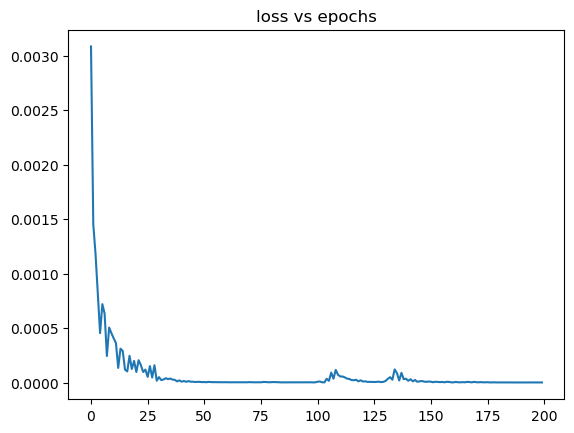

In [197]:
kpn.plt.plot(np.array(loss_store))
kpn.plt.title("loss vs epochs")

with open(dirFile+'/best_parameter.pkl', 'wb') as fp:
    kpn.pickle.dump(dict_para,fp)
    print(f'dictionary saved successfully to file : {dirFile+"/best_parameter.pkl"}')

In [198]:
norm_test_features.shape

(20, 3, 18)

In [199]:
# Assuming test_data is your input numpy array for testing
test_data = norm_test_features  # Example shape: (num_samples, num_timesteps, num_features)

# Convert test numpy array to PyTorch tensor
test_data_tensor = torch.tensor(test_data, dtype=torch.float32)

# Run inference
with torch.no_grad():
    test_outputs = loaded_model(test_data_tensor)

# Convert the outputs to numpy array if needed
test_outputs = test_outputs.numpy()

In [200]:
test_outputs.shape

(20, 18)

In [201]:
ytest.shape

(20, 18)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


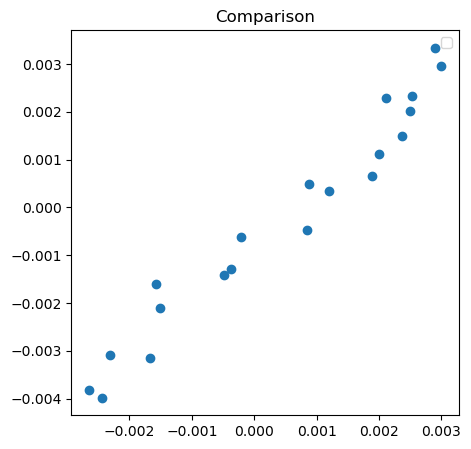

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


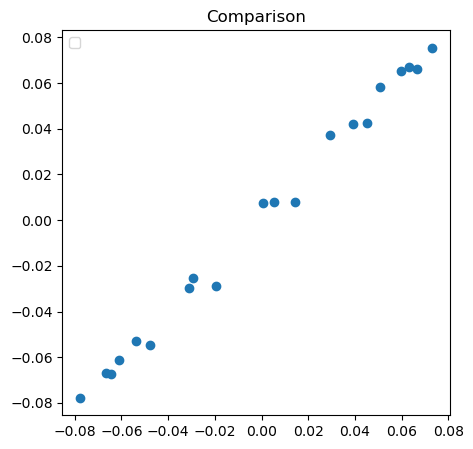

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


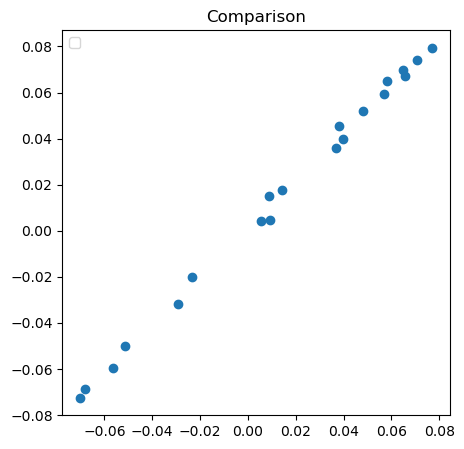

In [202]:
for i in range(3): #I will try to attend just the one on Friday. 
    kpn.plt.figure(figsize=(5,5))
    kpn.plt.scatter(ytest[:,i],test_outputs[:,i])
    kpn.plt.title('Comparison')
    kpn.plt.legend()
    filename = f'Comparison_{i}.png'
    kpn.plt.savefig(os.path.abspath(dirFile_result+'/'+filename), dpi = 200)
    kpn.plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


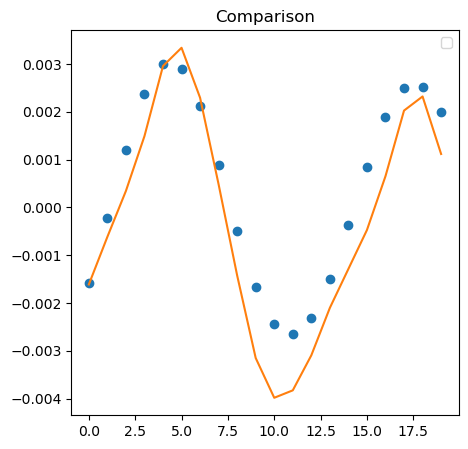

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


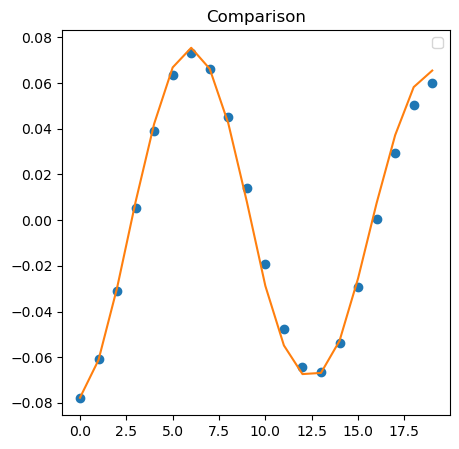

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


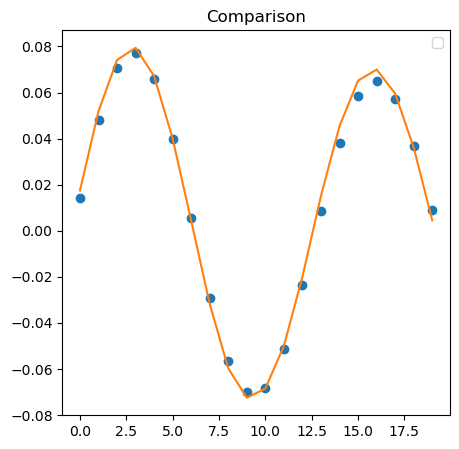

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


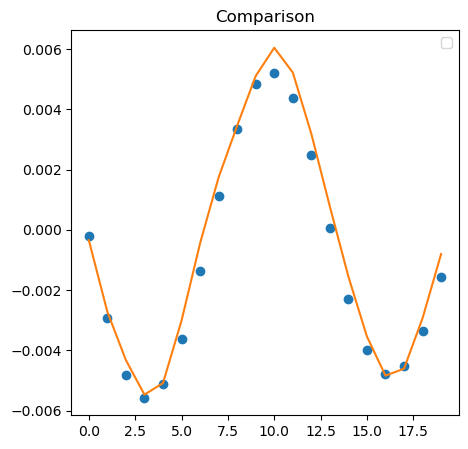

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


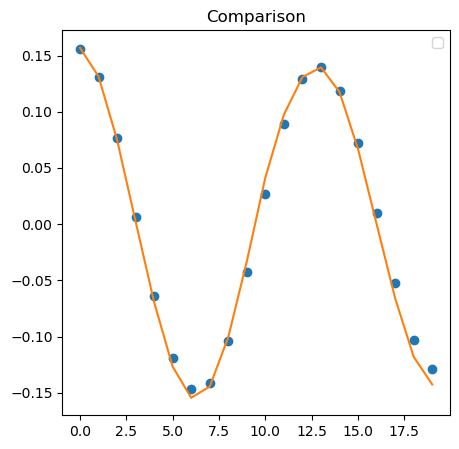

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


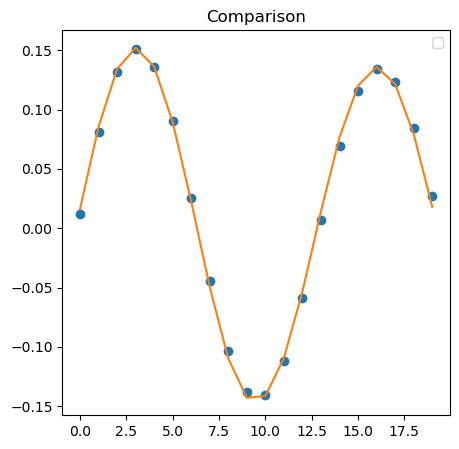

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


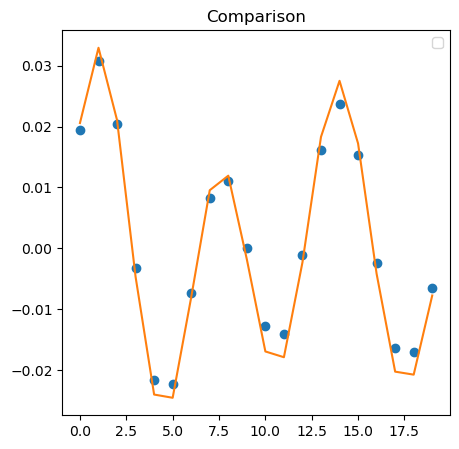

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


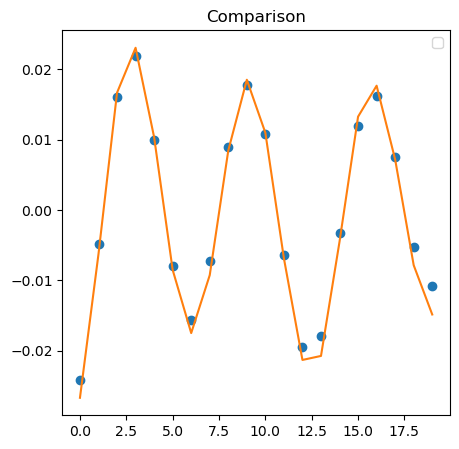

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


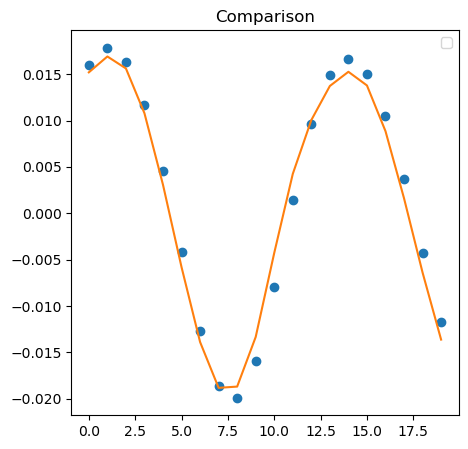

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


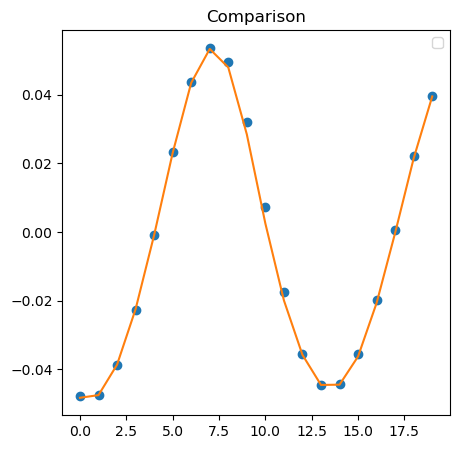

In [203]:
for i in range(10): 
    kpn.plt.figure(figsize=(5,5))
    kpn.plt.plot(ytest[:,i],'o')
    kpn.plt.plot(test_outputs[:,i])
    kpn.plt.title('Comparison')
    kpn.plt.legend()
    filename = f'Comparison_over{i}.png'
    kpn.plt.savefig(os.path.abspath(dirFile_result+'/'+filename), dpi = 200)
    kpn.plt.show()  

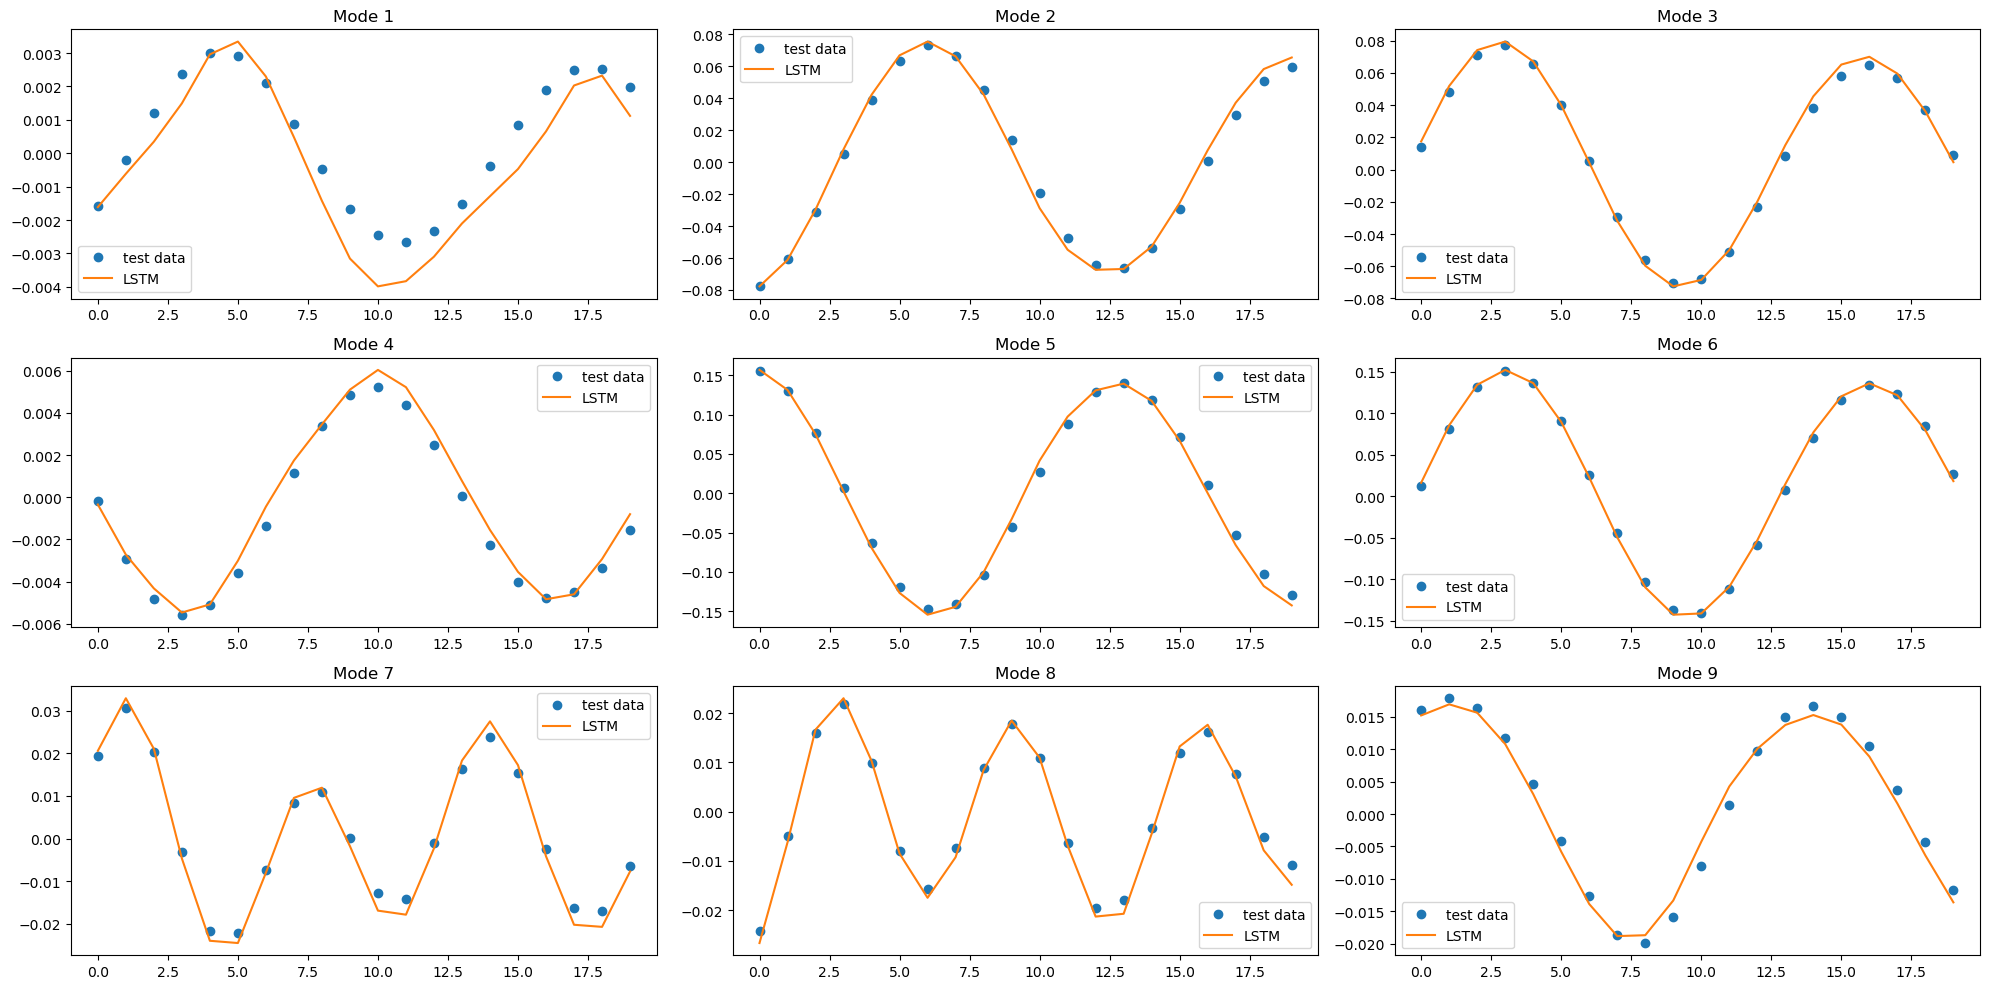

<Figure size 640x480 with 0 Axes>

In [204]:
# Create a 2x2 grid of subplots
# Set global font size for all elements
kpn.plt.rcParams.update({'font.size': 10})

fig, axes = kpn.plt.subplots(3, 3, figsize=(20, 10))
# Flatten the axes array for easy iteration
axes = axes.flatten()

for i in range(9): 
    
    axes[i].plot(ytest[:,i],'o',label='test data')
    axes[i].plot(test_outputs[:,i],label='LSTM')
    #axes[i].set_xlabel('X-axis', fontsize=7)  # Set X-axis label with smaller font
    #axes[i].set_ylabel('Y-axis', fontsize=7)  # Set Y-axis label with smaller font
    axes[i].set_title(f'Mode {i+1}')
    axes[i].legend()
filename = f'Comparison_10_over.png'

# Adjust layout to prevent overlap
kpn.plt.tight_layout()
kpn.plt.show()  
kpn.plt.savefig(os.path.abspath(dirFile_result+'/'+filename), dpi = 200)

In [205]:
# Convert the model to TorchScript
scripted_model = torch.jit.script(final_model)

# Save the scripted model
scripted_model.save('scripted_model_lstm_pytorch.pt')


# Use partial to fix the additional arguments
from functools import partial
wrapped_objective = partial(kpn.objective,xtrain=norm_train_features, ytrain=ytrain)

study = opt.create_study(direction="minimize", sampler=opt.samplers.TPESampler(), pruner=opt.pruners.HyperbandPruner())
#study.optimize(kpn.objective(xtrain,ytrain), n_trials=20)

study.optimize(wrapped_objective, n_trials=5)
#pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
#complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

kpn.show_result(study)

kpn.show_result(study)

dict_para=study.best_params

model,loss,val_loss=kpn.create_model1(dict_para,xtrain=norm_train_features, ytrain=ytrain)  #norm_train_features, ytrain=ytrain

In [206]:
kpn.plt.figure()
epochs = range(1, len(loss) + 1)
kpn.plt.semilogy(epochs, loss, 'b', label='Training loss')
kpn.plt.semilogy(epochs, val_loss, 'r', label='Validation loss')
kpn.plt.title('Training and validation loss')
kpn.plt.legend()
filename = 'HAM_lstm.png'
kpn.plt.savefig(os.path.abspath(dirFile+'/'+filename), dpi = 200)
kpn.plt.show()  

TypeError: len() of a 0-d tensor

<Figure size 640x480 with 0 Axes>

In [ ]:
model.save(dirFile+'/best_model.h5')

In [ ]:
print('xtrain shape for fit',A.shape)
print('ytrain shape for fit',MomentumRes.shape)
scores = model.evaluate(A, MomentumRes, verbose=0)
print("%s: %.6f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
type(ytest)

In [ ]:
xtest.shape

In [ ]:
# Inference
#Load model
model3=kpn.tf.keras.models.load_model(dirFile+'/best_model.h5')
model3.count_params()
model3.summary()
  
#Load and scale the test dataset.  
 
print("xtest,xtrain are NOT scaled. BUT norm_train_features,norm_test_feature ARE SCALED. So we scale xtest.")
print("ytest,ytrain are labels and NO scaling is NEEDED for them.")

#xtest shape: 20 x 3 x 18 for momentum. Scaled below for demonstrating inference.
normalizer_test=kpn.joblib.load(filename_4_scalingfunction)  
norm_test_features=kpn.scale_3D_inference(xtest,normalizer_test) # data_test_features
      
# Evaluate the model on train and test data
scores = model3.evaluate(norm_test_features, ytest, verbose=0)
print("%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))

#Predict model
addcorrection=model3.predict(norm_test_features) #nOTE USED OF SCALED FEATURE AS ARGUEMENT.

#Compare with ytest
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mae = mean_absolute_error(addcorrection,ytest)
print(f"Mean Absolute Error LSTM ensemble {mae}")
mse = mean_squared_error(addcorrection,ytest)
print(f"Mean Squared Error LSTM ensemble: {mse}")
mape = mean_absolute_percentage_error(ytest,addcorrection)
print(f"Mean Absolute Percentage Error LSTM ensemble: {mape}")

for i in range(addcorrection.shape[1]):
    kpn.plt.figure(figsize=(20,12))
    kpn.plt.plot(ytest[:,i],label='true')
    kpn.plt.plot(addcorrection[:,i],label='ML predicted')
    kpn.plt.title('Comparison plot')
    kpn.plt.legend()
    filename = f'Comparison plot_{i}.png'
    kpn.plt.savefig(os.path.abspath(dirFile_result+'/'+filename), dpi = 200)
    kpn.plt.show()  

kpn.plt.figure(figsize=(20,12))
kpn.plt.scatter(ytest,addcorrection)
kpn.plt.title('Comparison')
kpn.plt.legend()
filename = 'Comparison.png'
kpn.plt.savefig(os.path.abspath(dirFile_result+'/'+filename), dpi = 200)
kpn.plt.show()   


In [ ]:
#Predict model
addcorrection_train=model3.predict(norm_train_features)

#Compare with ytest
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mae = mean_absolute_error(addcorrection_train,ytrain)
print(f"Mean Absolute Error LSTM ensemble {mae}")
mse = mean_squared_error(addcorrection_train,ytrain)
print(f"Mean Squared Error LSTM ensemble: {mse}")
mape = mean_absolute_percentage_error(addcorrection_train,ytrain)
print(f"Mean Absolute Percentage Error LSTM ensemble: {mape}")

for i in range(addcorrection.shape[1]):
    kpn.plt.figure(figsize=(20,12))
    kpn.plt.plot(ytrain[:,i],label='true')
    kpn.plt.plot(addcorrection_train[:,i],label='ML predicted')
    kpn.plt.title('Comparison plot train')
    kpn.plt.legend()
    filename = f'Comparison plot_TRAIN_{i}.png'
    kpn.plt.savefig(os.path.abspath(dirFile_result+'/'+filename), dpi = 200)
    kpn.plt.show()  


-  # DATA PREPROCESSING HAS ENDED. TRAINING BEGINS. 
- Find demonstration in the TRAINING NOTEBOOK. 